In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import category_encoders as ce
import xgboost as xgb

# EDA

In [418]:
df = pd.read_csv("../data/raw/House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [419]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [420]:
df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [422]:
df.shape

(4746, 12)

In [423]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [424]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## Univariate Analysis

### Posted On

In [425]:
print('Unique dates:', df['Posted On'].nunique())
print('Date range:', df['Posted On'].min(), 'to', df['Posted On'].max())
df['Posted On'] = pd.to_datetime(df['Posted On'])

Unique dates: 81
Date range: 2022-04-13 to 2022-07-11


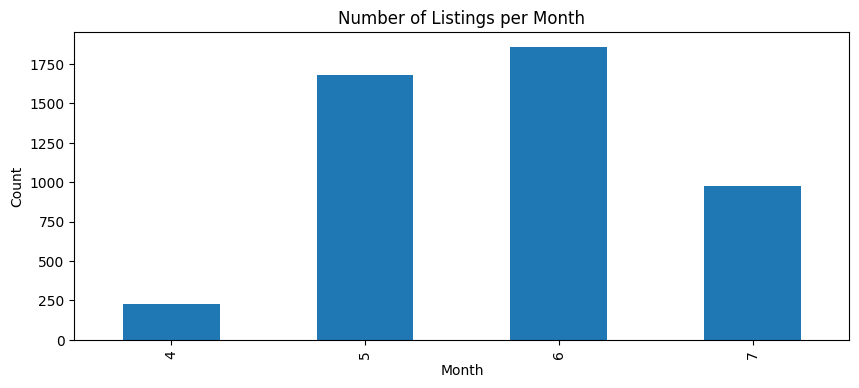

In [426]:
plt.figure(figsize=(10, 4))
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['Posted On'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Listings per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### BHK

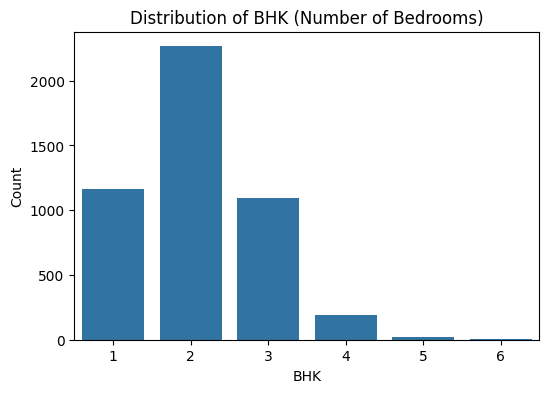

In [427]:
plt.figure(figsize=(6, 4))
sns.countplot(x='BHK', data=df)
plt.title('Distribution of BHK (Number of Bedrooms)')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

In [428]:
df['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

- The most common configuration is 2 BHK, followed by 1 BHK and 3 BHK.
- There are no unusual or extreme values; all entries are within expected residential ranges.

### Rent

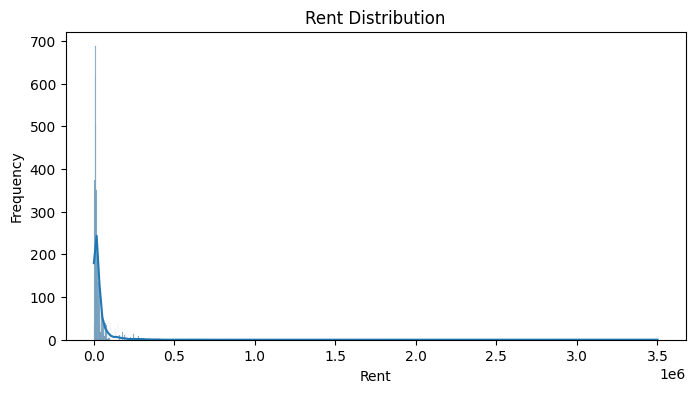

In [429]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Rent'], kde=True)
plt.title('Rent Distribution')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

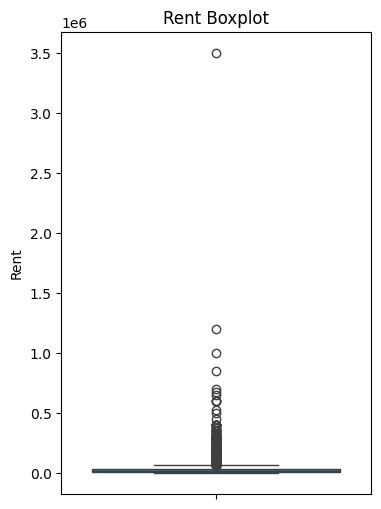

In [430]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Rent'])
plt.title('Rent Boxplot')
plt.show()

In [431]:
print("Mean House Rent:", round(df["Rent"].mean()))
print("Median House Rent:", round(df["Rent"].median()))
print("Highest House Rent:", round(df["Rent"].max()))
print("Lowest House Rent:", round(df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


In [432]:
df["Rent"].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [433]:
df["Rent"].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

- Rent values are right-skewed, with most properties in the lower to mid-range and a few outliers at the high end.
- The presence of high-rent outliers suggests some luxury or premium properties.
- The median rent is noticeably lower than the maximum, highlighting the skewness.

### Size

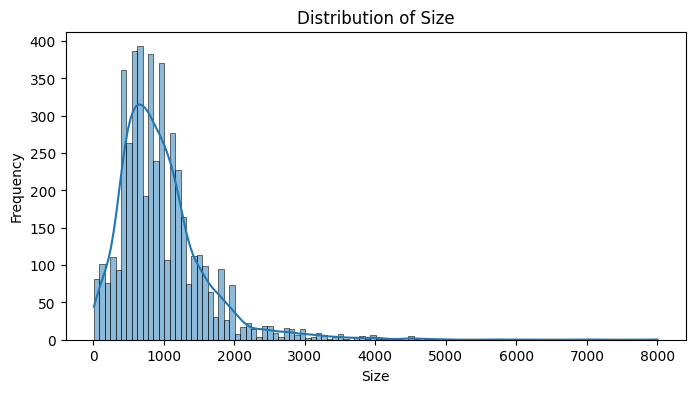

In [434]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Size'], kde=True)
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

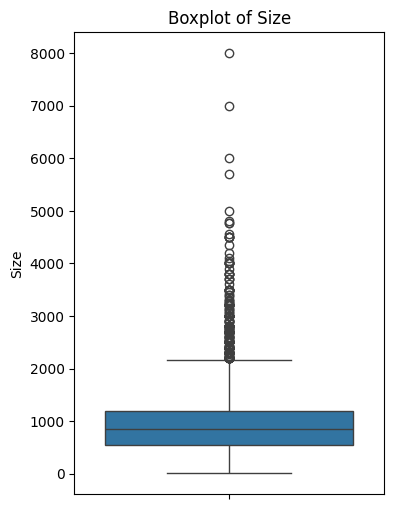

In [435]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Size'])
plt.title('Boxplot of Size')
plt.show()

- Most properties fall within a moderate size range, but there are a few much larger outliers.
- The size distribution is also right-skewed.
- Boxplot analysis reveals potential outliers that may represent atypical or high-end properties.

### Floor

In [436]:
df['Floor'].value_counts().head(10)

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
3 out of 4         239
Ground out of 3    209
1 out of 4         200
Ground out of 1    195
1 out of 1         134
Name: count, dtype: int64

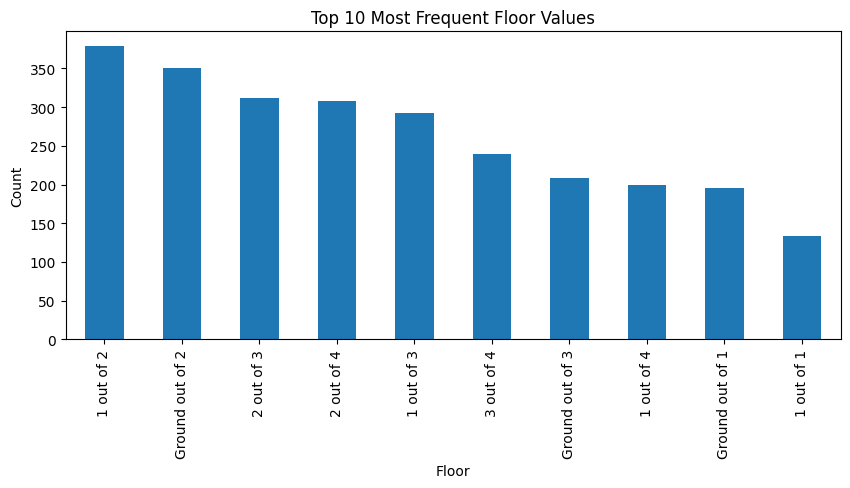

In [437]:
plt.figure(figsize=(10, 4))
df['Floor'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Floor Values')
plt.xlabel('Floor')
plt.ylabel('Count')
plt.show()

- Floor information is presented as a combination of current floor and total floors (e.g., "1 out of 3").
- Ground and 1st floors are the most frequently listed.

### Area type

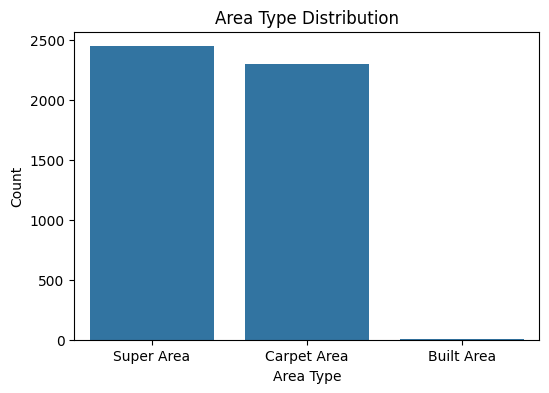

In [438]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Area Type', data=df)
plt.title('Area Type Distribution')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

In [439]:
df['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

- The majority of examples are classified as 'Super Area', with 'Carpet Area' and 'Built Area' being less frequent.

### Area Locality

In [440]:
print('\nNumber of unique Area Localities:', df['Area Locality'].nunique())
print('Most common Area Localities:')
print(df['Area Locality'].value_counts().head(10))


Number of unique Area Localities: 2235
Most common Area Localities:
Area Locality
Bandra West        37
Gachibowli         29
Electronic City    24
Miyapur, NH 9      22
Velachery          22
Madipakkam         20
Chembur            19
Laxmi Nagar        19
K R Puram          19
Kondapur           18
Name: count, dtype: int64


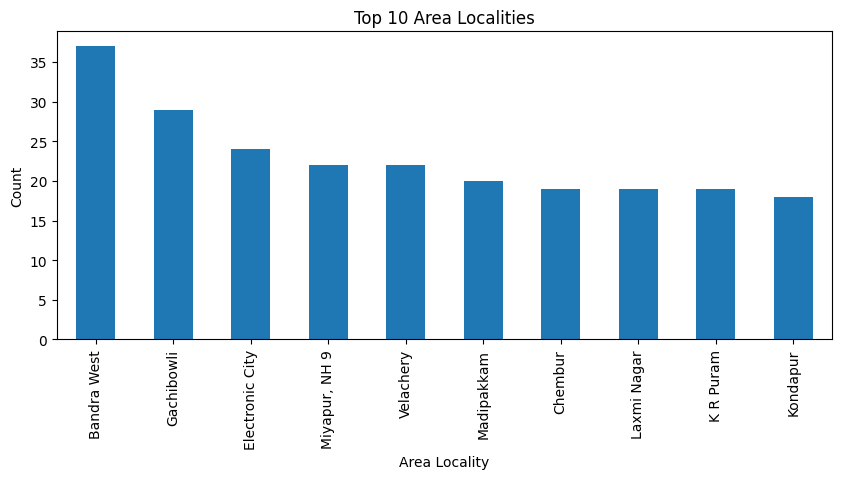

In [441]:
plt.figure(figsize=(10, 4))
df['Area Locality'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Area Localities')
plt.xlabel('Area Locality')
plt.ylabel('Count')
plt.show()

- There are many unique localities, with a few localities appearing much more frequently.
- The top localities account for a significant number of examples, while most localities are sparsely represented.

### City

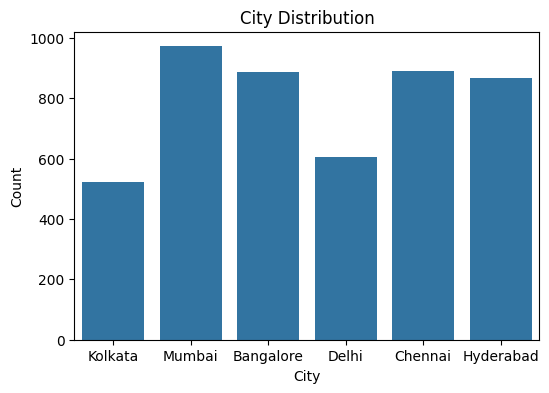

In [442]:
plt.figure(figsize=(6, 4))
sns.countplot(x='City', data=df)
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [443]:
print(df['City'].value_counts())

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64


### Furnishing Status

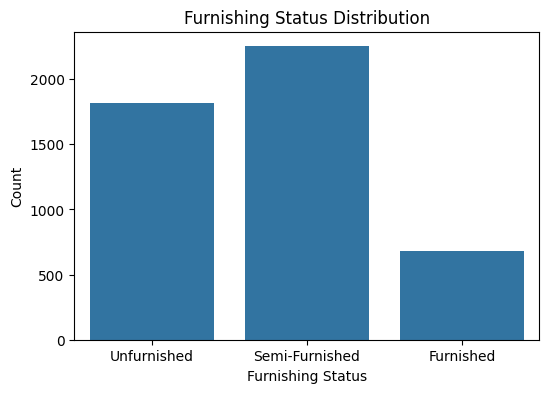

In [444]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Furnishing Status', data=df)
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

In [445]:
df['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

- 'Unfurnished' is the most common furnishing status, followed by 'Semi-Furnished' and 'Furnished'.

### Tenant Preferred

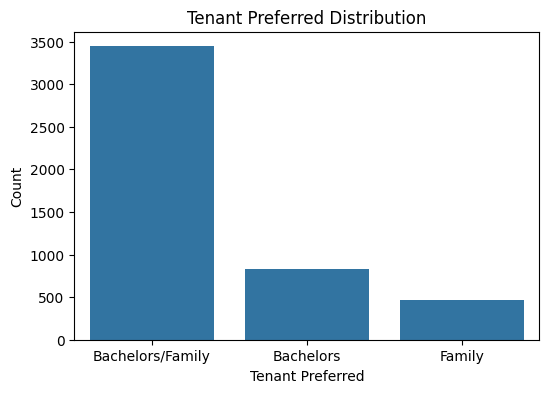

In [446]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Tenant Preferred', data=df)
plt.title('Tenant Preferred Distribution')
plt.xlabel('Tenant Preferred')
plt.ylabel('Count')
plt.show()

In [447]:
df['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

### Bathroom

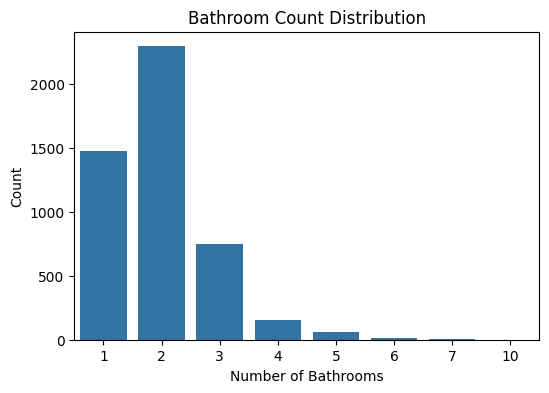

In [448]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Bathroom', data=df)
plt.title('Bathroom Count Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

In [449]:
df['Bathroom'].value_counts()

Bathroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

- The majority of properties offer 1 or 2 bathrooms.
- No extreme or invalid values are present.

### Point of Contact

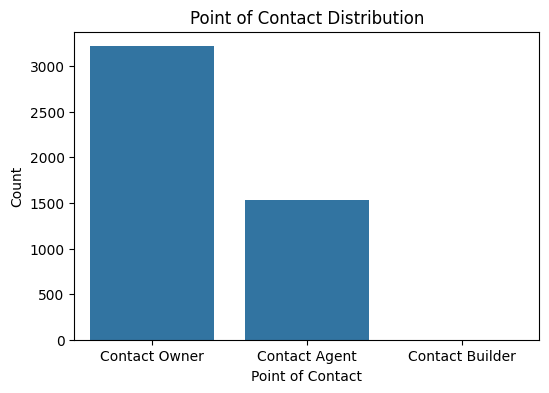

In [450]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Point of Contact', data=df)
plt.title('Point of Contact Distribution')
plt.xlabel('Point of Contact')
plt.ylabel('Count')
plt.show()

In [451]:
df['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

- Most examples are posted by owners, followed by agents, and a few by builders.

## Multivariate Analysis

### Correlation heatmap (Numerical features)

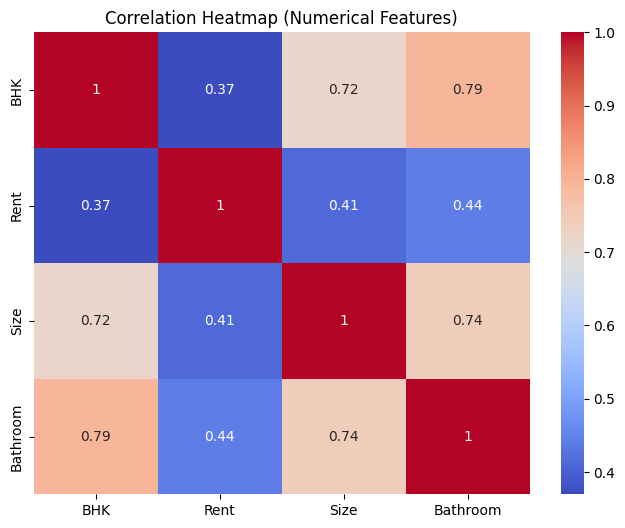

In [452]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

### Pairplot for numerical variables

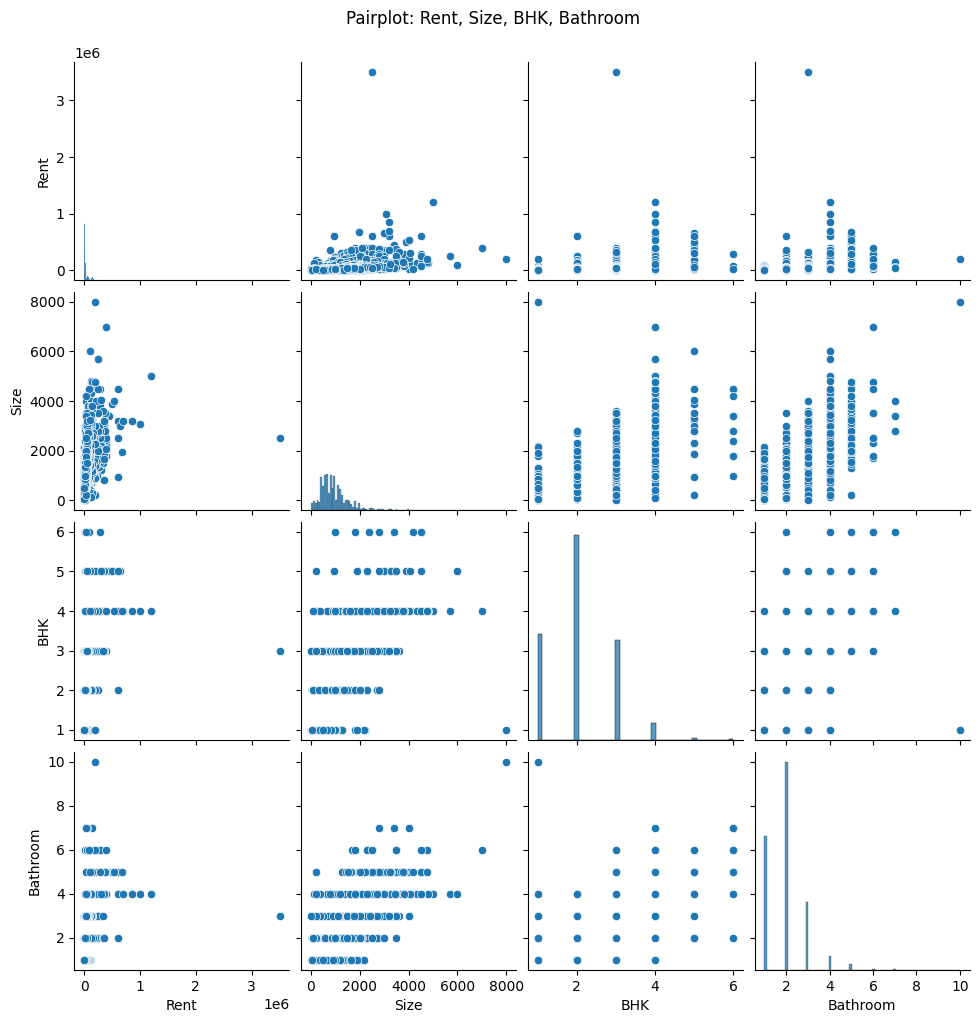

In [453]:
sns.pairplot(df[['Rent', 'Size', 'BHK', 'Bathroom']])
plt.suptitle('Pairplot: Rent, Size, BHK, Bathroom', y=1.02)
plt.show()

### Barplot: Rent vs. BHK, colored by Furnishing Status

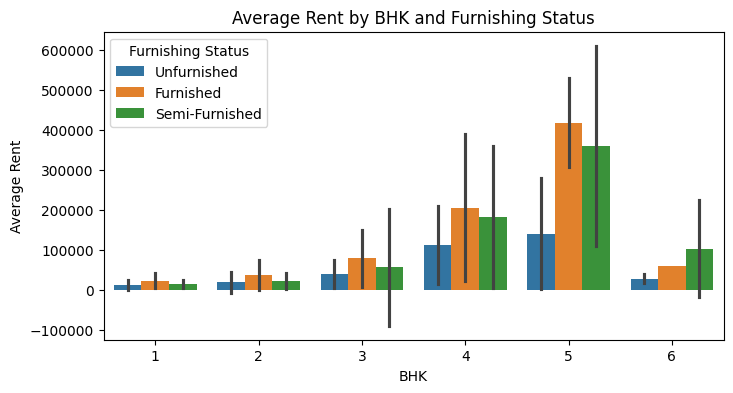

In [454]:
plt.figure(figsize=(8, 4))
sns.barplot(x='BHK', y='Rent', hue='Furnishing Status', data=df, errorbar='sd')
plt.title('Average Rent by BHK and Furnishing Status')
plt.ylabel('Average Rent')
plt.show()

### Barplot: Rent vs. Area Type

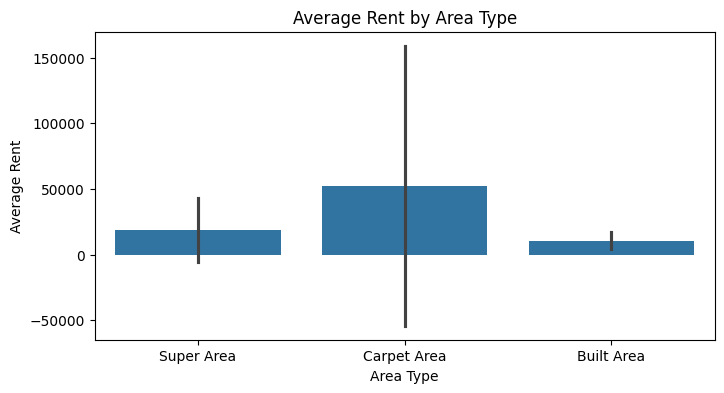

In [455]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Area Type', y='Rent', data=df, errorbar='sd')
plt.title('Average Rent by Area Type')
plt.ylabel('Average Rent')
plt.show()

### Rent distribution by Tenant Preferred

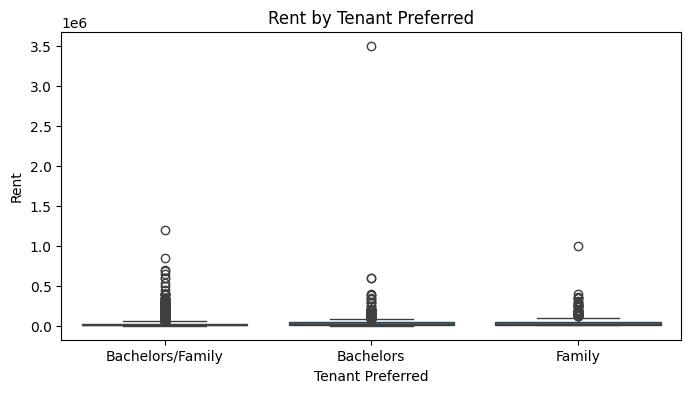

In [456]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Tenant Preferred', y='Rent', data=df)
plt.title('Rent by Tenant Preferred')
plt.show()

### Scatterplot: Size vs. Rent, colored by BHK

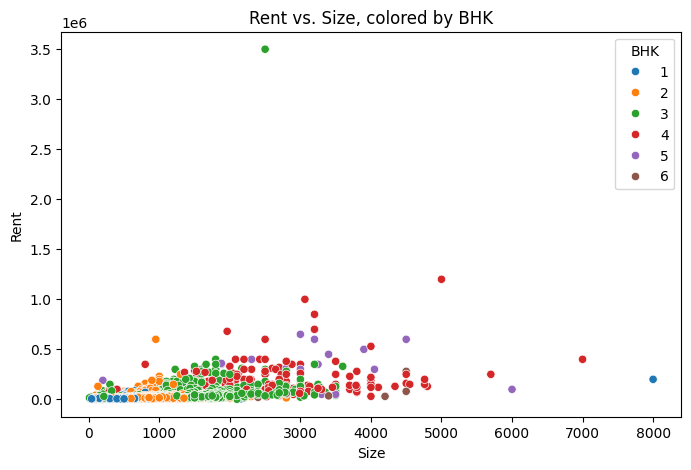

In [457]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size', y='Rent', hue='BHK', data=df, palette='tab10')
plt.title('Rent vs. Size, colored by BHK')
plt.show()

### Relationship between Floor (extract floor number) and Rent

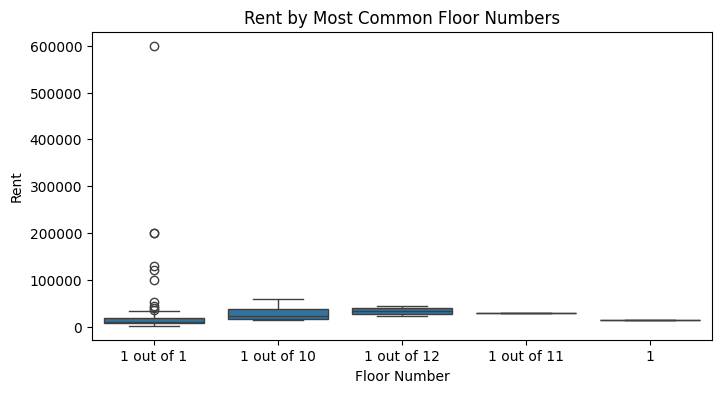

In [458]:
top_floors = df['Floor'].value_counts().sort_index().head(5).index
plt.figure(figsize=(8,4))
sns.boxplot(x='Floor', y='Rent', data=df[df['Floor'].isin(top_floors)])
plt.title('Rent by Most Common Floor Numbers')
plt.xlabel('Floor Number')
plt.ylabel('Rent')
plt.show()

### Average rent for top 10 area localities

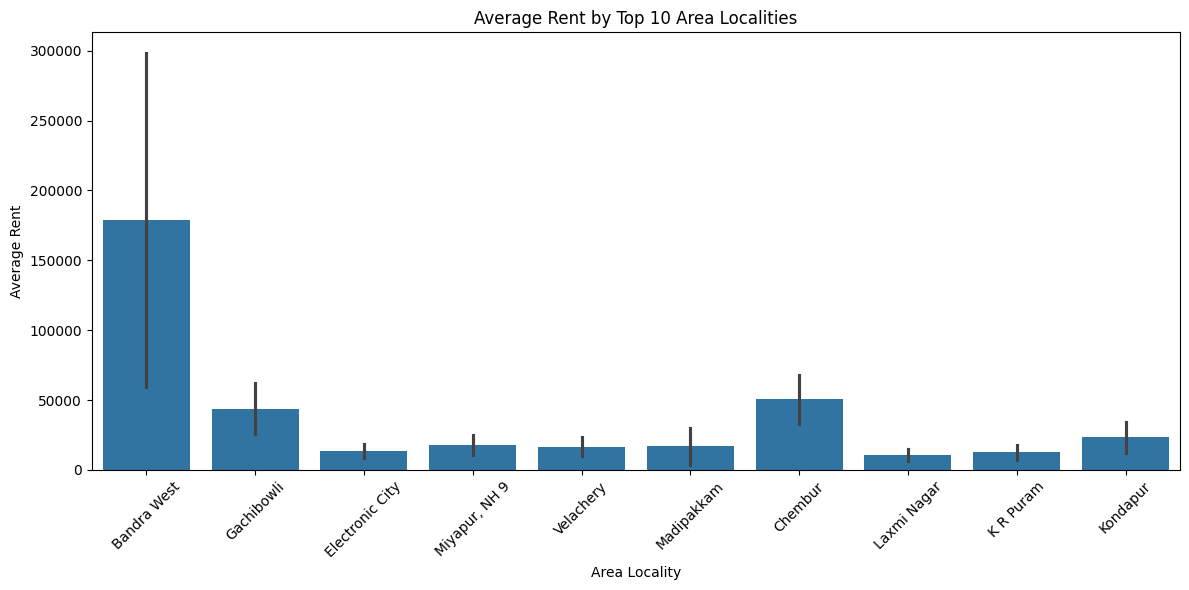

In [459]:
top_localities = df['Area Locality'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Area Locality',
    y='Rent',
    data=df[df['Area Locality'].isin(top_localities)],
    estimator='mean',
    errorbar='sd',
    order=top_localities
)
plt.title('Average Rent by Top 10 Area Localities')
plt.xlabel('Area Locality')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cross-tabulation: Furnishing Status and Tenant Preferred

In [460]:
cross_tab = pd.crosstab(df['Furnishing Status'], df['Tenant Preferred'])
print("Crosstab: Furnishing Status vs. Tenant Preferred")
print(cross_tab)

Crosstab: Furnishing Status vs. Tenant Preferred
Tenant Preferred   Bachelors  Bachelors/Family  Family
Furnishing Status                                     
Furnished                 97               508      75
Semi-Furnished           324              1675     252
Unfurnished              409              1261     145


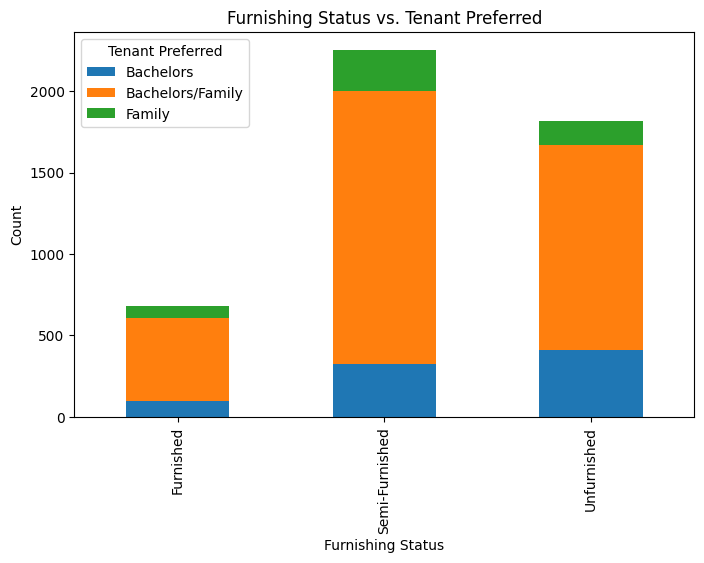

In [461]:
cross_tab.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Furnishing Status vs. Tenant Preferred')
plt.ylabel('Count')
plt.show()

#### 1. Correlation Between Numerical Variables
- There is a strong positive correlation between property Size and Rent, indicating that larger properties generally command higher rents.
- BHK (number of bedrooms) and Bathroom count are also moderately correlated with both Size and Rent, which is expected as properties with more bedrooms and bathrooms tend to be larger and more expensive.

#### 2. Rent vs. Area Type
- Properties with 'Super Area' type generally have higher average rents compared to those with 'Carpet Area' or 'Built Area'.
- The distribution of rent is wider for 'Super Area', suggesting more variability in property size or quality within this category.

#### 3. Rent vs. BHK and Furnishing Status
- For each BHK category, 'Furnished' properties tend to have higher rents than 'Unfurnished' or 'Semi-Furnished' ones.
- The difference in rent based on furnishing status is more pronounced in properties with a higher number of bedrooms.

#### 4. Rent vs. Tenant Preferred
- Properties open to both bachelors and families have a wide range of rents, suggesting less restriction on rent price.
- Listings restricted to only families or only bachelors show somewhat lower rent on average.

#### 5. Rent vs. Bathroom
- Properties with more bathrooms generally have higher rents, further showing that additional amenities are associated with higher prices.
- The rent distribution becomes wider as the number of bathrooms increases, likely reflecting luxury or high-end properties.

#### 6. Rent vs. Floor Number
- There is no strong or clear trend between floor number and rent after grouping floors; however, very high floors and ground floors sometimes show slightly different rent patterns, possibly due to specific preferences in the local market.

#### 7. Rent vs. Area Locality
- The top localities have noticeably higher average rents, suggesting that location is a key driver of price. 
- Some localities are clear outliers in terms of rent, reflecting premium neighborhoods.

#### 8. Categorical Variable Interactions
- Cross-tabulation between 'Furnishing Status' and 'Tenant Preferred' shows that most fully furnished listings are open to both bachelors and families.
- Owner-listed properties tend to be more open to all tenant types, while agent or builder listings sometimes target specific groups.

# Dataset Transformation

In [462]:
df1 = df.copy()
df1

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [463]:
def parse_floor(floor_str):
    if pd.isnull(floor_str):
        return np.nan, np.nan
    floor_str = floor_str.strip()
    if "out of" in floor_str:
        part, total = floor_str.split("out of")
        part = part.strip()
        total = total.strip()
        if part == "Ground":
            floor_num = 0
        elif part == "Upper Basement":
            floor_num = -1
        elif part == "Lower Basement":
            floor_num = -2
        elif part.isdigit():
            floor_num = int(part)
        else:
            floor_num = np.nan
        try:
            total_floors = int(total)
        except:
            total_floors = np.nan
        return floor_num, total_floors
    elif floor_str.isdigit():
        return int(floor_str), np.nan
    elif floor_str == "Ground":
        return 0, np.nan
    else:
        return np.nan, np.nan

This function takes a string describing the floor of an apartment (for example, `"3 out of 10"`, `"Ground out of 5"`, `"Upper Basement out of 4"`, `"5"`, or `"Ground"`) and extracts two numeric values:

1. **The specific floor number** (e.g., 3 for the third floor, 0 for ground, -1 for upper basement, -2 for lower basement)
2. **The total number of floors** in the building (if available)

In [464]:
df1[['Floor_num', 'Total_floors']] = df1['Floor'].apply(lambda x: pd.Series(parse_floor(x)))
df1 = df1.drop(['Floor', 'Posted On', 'Point of Contact'], axis=1)
df1['Floor_num'] = df1['Floor_num'].fillna(df1['Floor_num'].median())
df1['Total_floors'] = df1['Total_floors'].fillna(df1['Total_floors'].median())

In [465]:
upper = df1['Rent'].quantile(0.99)
df1 = df1[df1['Rent'] < upper]

df1['Rent_log'] = np.log1p(df1['Rent'])

Cleans the data by removing extreme high-value outliers and then applies a log transformation to the rent values to make them more suitable for modeling.

In [466]:
target_enc = ce.TargetEncoder(cols=['Area Locality'])
df1['Area Locality'] = target_enc.fit_transform(df1['Area Locality'], df1['Rent_log'])

Target encoding is particularly effective for categorical features with many unique values that have a strong and meaningful relationship with the target variable, such as `'Area Locality'` and rental prices. It helps the model leverage valuable information from the data while maintaining efficiency and avoiding unnecessary complexity.

In [467]:
categorical_cols = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']
df1 = pd.get_dummies(df1, columns=categorical_cols, drop_first=True,dtype='int')
df1

,BHK,Rent,Size,Area Locality,Bathroom,Floor_num,Total_floors,Rent_log,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,9.723255,2,0.0,2.0,9.210440,0,1,0,0,0,1,0,0,1,1,0
1,2,20000,800,9.728517,1,1.0,3.0,9.903538,0,1,0,0,0,1,0,1,0,1,0
2,2,17000,1000,9.894690,1,1.0,3.0,9.741027,0,1,0,0,0,1,0,1,0,1,0
3,2,10000,800,9.809723,1,1.0,2.0,9.210440,0,1,0,0,0,1,0,0,1,1,0
4,2,7500,850,9.723815,1,1.0,2.0,8.922792,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,9.818075,2,3.0,5.0,9.615872,1,0,0,0,1,0,0,1,0,1,0
4742,3,29000,2000,9.899760,3,1.0,4.0,10.275086,0,1,0,0,1,0,0,1,0,1,0
4743,3,35000,1750,9.928799,3,3.0,5.0,10.463132,1,0,0,0,1,0,0,1,0,1,0
4744,3,45000,1500,10.367136,2,23.0,34.0,10.714440,1,0,0,0,1,0,0,1,0,0,1


In [468]:
X = df1.drop(['Rent', 'Rent_log'], axis=1)
y = df1['Rent_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [469]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_orig = np.expm1(y_test)

    mse = mean_squared_error(y_test_orig, y_pred)
    mae = mean_absolute_error(y_test_orig, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_orig, y_pred)

    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    return y_test_orig, y_pred

def plot_actual_vs_predicted(y_true, y_pred, n_points=1000):
    plt.figure(figsize=(8,8))
    plt.scatter(y_true[:n_points], y_pred[:n_points], alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Ideal')
    plt.xlabel('Actual Rent')
    plt.ylabel('Predicted Rent')
    plt.title('Actual vs Predicted Rent')
    plt.legend()
    plt.grid(True)
    plt.show()

In [470]:
dt = DecisionTreeRegressor(random_state=42)
dt = train_model(dt, X_train, y_train)
y_test_orig, y_pred = evaluate_model(dt, X_test, y_test)

MSE: 260215586.73
MAE: 6609.62
RMSE: 16131.20
R^2: 0.83


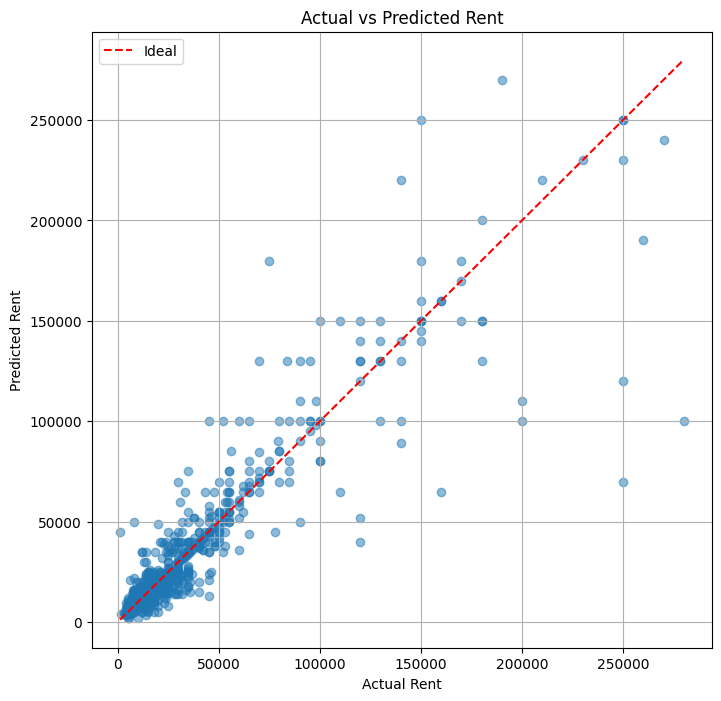

In [471]:
plot_actual_vs_predicted(y_test_orig, y_pred)

In [472]:
rf = RandomForestRegressor(random_state=42)
rf = train_model(rf, X_train, y_train)
y_test_orig, y_pred = evaluate_model(rf, X_test, y_test)

MSE: 208635390.42
MAE: 5590.45
RMSE: 14444.22
R^2: 0.86


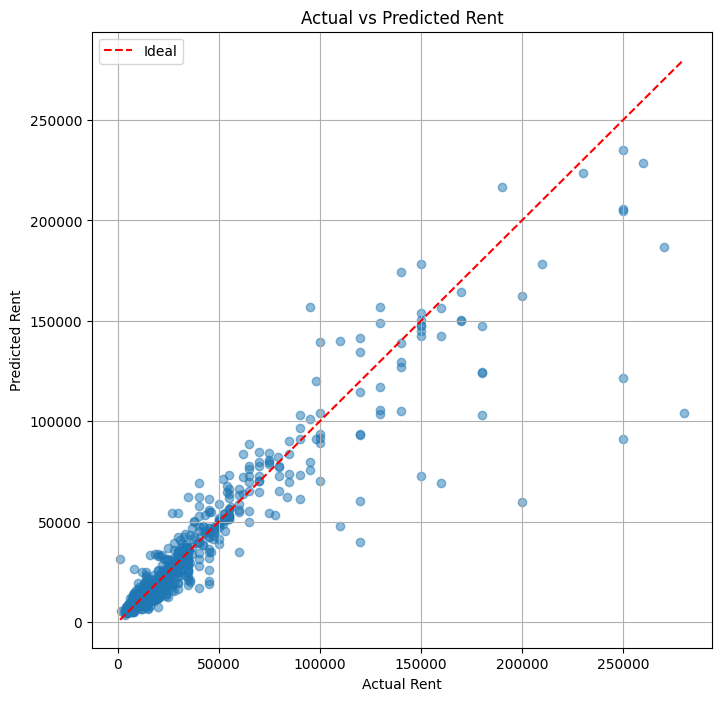

In [473]:
plot_actual_vs_predicted(y_test_orig, y_pred)

In [474]:
xgbr = xgb.XGBRegressor(random_state=42)
xgbr = train_model(xgbr, X_train, y_train)
y_test_orig, y_pred = evaluate_model(xgbr, X_test, y_test)

MSE: 230541608.38
MAE: 6052.29
RMSE: 15183.60
R^2: 0.85


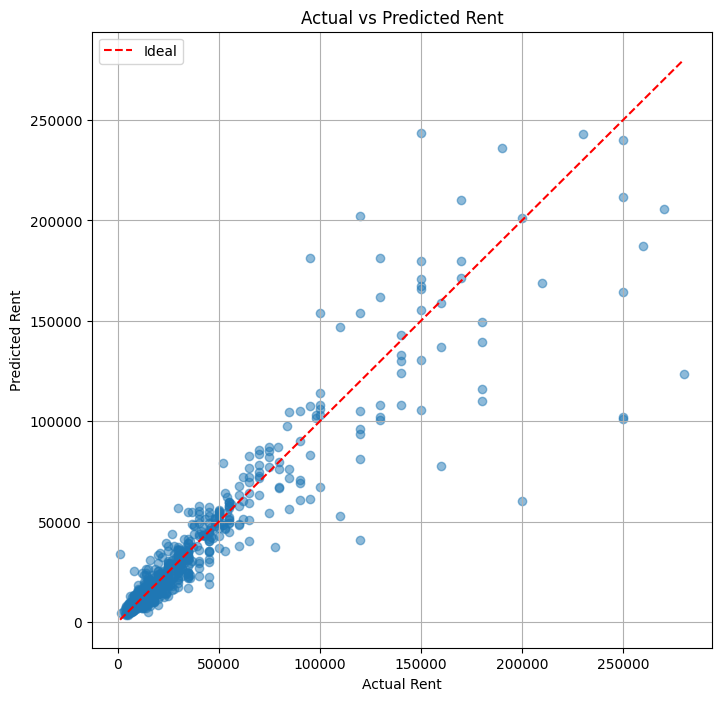

In [475]:
plot_actual_vs_predicted(y_test_orig, y_pred)

In [489]:
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3,5,7,10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.5,0.8, 1],
    "colsample_bytree": [0.5,0.8, 1]
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))
neg_rmse_scorer = make_scorer(rmse, greater_is_better=False)

I chose RMSE (Root Mean Squared Error) as the metric for GridSearch because RMSE penalizes large errors more than smaller ones. By doing this, I aim to find model parameters that reduce the likelihood of making significant mistakes on high-value predictions.
Additionally, I created a function that returns the negative RMSE. This is because, in scikit-learn’s GridSearch scoring function, the score is always maximized. Since lower RMSE is better, using the negative value ensures that GridSearch selects model parameters that minimize the actual RMSE.

In [490]:
rf_grid = GridSearchCV(
    rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring=neg_rmse_scorer,
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
print("Best RF params:", rf_grid.best_params_)
print("Best RF score (neg-RMSE):", rf_grid.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best RF params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF score (neg-RMSE): -13959.83035074153


In [491]:
xgb_grid = GridSearchCV(
    xgbr,
    param_grid=xgb_param_grid,
    cv=5,
    scoring=neg_rmse_scorer,
    verbose=2,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)
print("Best XGB params:", xgb_grid.best_params_)
print("Best XGB score (neg-RMSE):", xgb_grid.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best XGB params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best XGB score (neg-RMSE): -13687.10457167108


In [484]:
def evaluate_final(model, X_test, y_test):
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")

In [492]:
print("Final RF test score")
evaluate_final(rf_grid.best_estimator_, X_test, y_test)

Final RF test score
MSE: 208635390.42
MAE: 5590.45
RMSE: 14444.22
R^2: 0.86


In [493]:
print("Final XGB test score")
evaluate_final(xgb_grid.best_estimator_, X_test, y_test)

Final XGB test score
MSE: 208361652.35
MAE: 5602.23
RMSE: 14434.74
R^2: 0.87
